In [1]:
#project: p6
#submitter: abkazan
#partner: none
#hours: 10
import geopandas as gpd
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
#Q1
gdf = gpd.read_file('counties.geojson')
len(gdf)

72

In [3]:
gdf.head()

,NAME,POP100,geometry
0,Racine County,195408,"POLYGON ((-88.07073 42.66976, -88.06897 42.669..."
1,Clark County,34690,"POLYGON ((-90.55875 44.42221, -90.53398 44.422..."
2,Wood County,74749,"POLYGON ((-89.72464 44.33712, -89.72460 44.338..."
3,Rusk County,14755,"POLYGON ((-90.92517 45.37935, -90.92515 45.379..."
4,Ozaukee County,86395,"POLYGON ((-87.89269 43.19202, -87.89265 43.192..."


<AxesSubplot:>

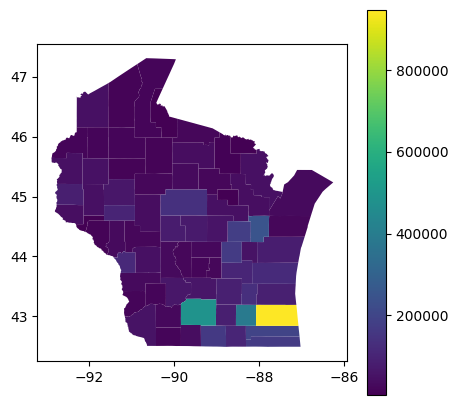

In [4]:
#Q2
fig, ax = plt.subplots(figsize=(5, 5))
gdf.plot(column = "POP100", ax = ax, legend = True)

In [5]:
conn = sqlite3.connect("counties_tracts.db")
pd.read_sql("""SELECT * FROM sqlite_master""", conn)
counties_df = pd.read_sql("""SELECT * FROM counties""", conn)
arealand = counties_df["AREALAND"]
gdf = pd.concat([gdf, arealand], axis=1)
#dont run this again


In [6]:
gdf

,NAME,POP100,geometry,AREALAND
0,Racine County,195408,"POLYGON ((-88.07073 42.66976, -88.06897 42.669...",861533739
1,Clark County,34690,"POLYGON ((-90.55875 44.42221, -90.53398 44.422...",3133378070
2,Wood County,74749,"POLYGON ((-89.72464 44.33712, -89.72460 44.338...",2054044751
3,Rusk County,14755,"POLYGON ((-90.92517 45.37935, -90.92515 45.379...",2366092584
4,Ozaukee County,86395,"POLYGON ((-87.89269 43.19202, -87.89265 43.192...",603514413
...,...,...,...,...
67,Washburn County,15911,"POLYGON ((-91.55065 46.07034, -91.55065 46.070...",2064515991
68,Monroe County,44673,"POLYGON ((-90.55246 43.72565, -90.55096 43.725...",2333270295
69,Richland County,18021,"POLYGON ((-90.31107 43.55399, -90.31108 43.553...",1518120276
70,Price County,14159,"POLYGON ((-90.04485 45.81765, -90.04440 45.830...",3248866440


In [7]:
arealand

0      861533739
1     3133378070
2     2054044751
3     2366092584
4      603514413
         ...    
67    2064515991
68    2333270295
69    1518120276
70    3248866440
71    1871138853
Name: AREALAND, Length: 72, dtype: int64

In [8]:
train, test = train_test_split(gdf, test_size=0.25, random_state=250)

In [9]:
#Q3
test["NAME"].values.tolist()

['Dane County',
 'Juneau County',
 'Taylor County',
 'Vilas County',
 'Rusk County',
 'Price County',
 'Jackson County',
 'Waushara County',
 'Pepin County',
 'Douglas County',
 'Ashland County',
 'Milwaukee County',
 'Waupaca County',
 'Richland County',
 'Lafayette County',
 'Washburn County',
 'Dunn County',
 'Bayfield County']

In [10]:
#Q4
x_cols = ["AREALAND"]
y_col = "POP100"
model = LinearRegression()
model.fit(train[x_cols], train[y_col])
y = model.predict(test[x_cols])
model.score(test[x_cols], test[y_col])

0.016720430179409274

In [11]:
#Q5
pred_area = 400 * 2.59 * 1000000
model.intercept_ + (model.coef_[0] * pred_area) 

90000.07422783462

In [12]:
pd.read_sql("""SELECT * FROM sqlite_master""", conn)

,type,name,tbl_name,rootpage,sql
0,table,counties,counties,2,"CREATE TABLE ""counties"" (\n""index"" INTEGER,\n ..."
1,index,ix_counties_index,counties,3,"CREATE INDEX ""ix_counties_index""ON ""counties"" ..."
2,table,tracts,tracts,4,"CREATE TABLE ""tracts"" (\n""index"" INTEGER,\n ""..."
3,index,ix_tracts_index,tracts,5,"CREATE INDEX ""ix_tracts_index""ON ""tracts"" (""in..."


In [13]:
tracts = pd.read_sql("""SELECT * FROM tracts""", conn)
tracts

,index,NAME,COUNTY,HU100
0,0,Census Tract 9701.01,085,2760
1,1,Census Tract 9710.01,085,1536
2,2,Census Tract 9706.01,085,1208
3,3,Census Tract 9706.02,085,3136
4,4,Census Tract 4301,131,2144
...,...,...,...,...
1404,1404,Census Tract 14,059,2913
1405,1405,Census Tract 15,059,1550
1406,1406,Census Tract 16,059,1286
1407,1407,Census Tract 17,059,1068


In [14]:
counties_dict = {}
for row in tracts.iterrows():
    if row[1]["COUNTY"] in counties_df["COUNTY"].tolist():
        if row[1]["COUNTY"] in counties_dict.keys():
            counties_dict[row[1]["COUNTY"]] += row[1]["HU100"]
        else:
            counties_dict[row[1]["COUNTY"]] = row[1]["HU100"]
counties_dict

{'085': 30125,
 '131': 54695,
 '019': 15076,
 '053': 9727,
 '125': 25116,
 '027': 37005,
 '077': 9896,
 '091': 3579,
 '119': 10582,
 '039': 43910,
 '079': 418053,
 '009': 104371,
 '101': 82164,
 '007': 12999,
 '063': 48402,
 '025': 216022,
 '133': 160864,
 '033': 17964,
 '087': 73149,
 '065': 7230,
 '041': 8970,
 '013': 15278,
 '109': 33983,
 '141': 34088,
 '081': 19204,
 '121': 12619,
 '071': 37189,
 '021': 26137,
 '105': 68422,
 '051': 5999,
 '061': 9304,
 '073': 57734,
 '139': 73329,
 '083': 23537,
 '001': 17436,
 '055': 35147,
 '135': 25396,
 '078': 2253,
 '123': 13720,
 '017': 27185,
 '107': 8883,
 '069': 16784,
 '127': 51531,
 '075': 30379,
 '045': 15856,
 '095': 24248,
 '015': 19695,
 '137': 14843,
 '011': 6664,
 '117': 50766,
 '005': 23614,
 '113': 15975,
 '129': 12979,
 '031': 22825,
 '097': 30054,
 '093': 16132,
 '043': 21581,
 '111': 29708,
 '037': 4780,
 '047': 10616,
 '099': 11120,
 '067': 12360,
 '003': 9656,
 '035': 42151,
 '089': 36267,
 '049': 10719,
 '115': 20720,
 '0

In [15]:
counties = pd.read_sql("""SELECT * FROM counties""", conn)
county_codes = {}
for row in counties.iterrows():
    county_codes[row[1]["NAME"]] = row[1]["COUNTY"]
county_codes

{'Racine County': '101',
 'Clark County': '019',
 'Wood County': '141',
 'Rusk County': '107',
 'Ozaukee County': '089',
 'Buffalo County': '011',
 'Winnebago County': '139',
 'Waukesha County': '133',
 'Langlade County': '067',
 'Pepin County': '091',
 'Kenosha County': '059',
 'Fond du Lac County': '039',
 'Dodge County': '027',
 'Burnett County': '013',
 'Grant County': '043',
 'Milwaukee County': '079',
 'Shawano County': '115',
 'Juneau County': '057',
 'Marinette County': '075',
 'Sawyer County': '113',
 'Chippewa County': '017',
 'Florence County': '037',
 'Taylor County': '119',
 'Walworth County': '127',
 'Polk County': '095',
 'Eau Claire County': '035',
 'Sauk County': '111',
 'Marathon County': '073',
 'Iron County': '051',
 'Outagamie County': '087',
 'Rock County': '105',
 'Jefferson County': '055',
 'Oneida County': '085',
 'Dunn County': '033',
 'Waupaca County': '135',
 'Waushara County': '137',
 'Sheboygan County': '117',
 'Trempealeau County': '121',
 'Vilas County':

In [16]:
HU100_arr = []
for row in gdf.iterrows():
    HU100_arr.append(counties_dict[county_codes[row[1]["NAME"]]])
HU100_arr


[82164,
 15076,
 34088,
 8883,
 36267,
 6664,
 73329,
 160864,
 12360,
 3579,
 69288,
 43910,
 37005,
 15278,
 21581,
 418053,
 20720,
 14669,
 30379,
 15975,
 27185,
 4780,
 10582,
 51531,
 24248,
 42151,
 29708,
 57734,
 5999,
 73149,
 68422,
 35147,
 30125,
 17964,
 25396,
 14843,
 50766,
 12619,
 25116,
 15856,
 10616,
 16132,
 9896,
 37189,
 8970,
 48402,
 8802,
 7230,
 10719,
 23537,
 30054,
 54695,
 12999,
 9656,
 22825,
 26137,
 23966,
 23614,
 9304,
 216022,
 16784,
 19695,
 2253,
 13720,
 104371,
 17436,
 9727,
 12979,
 19204,
 8868,
 11120,
 33983]

In [17]:
housing_series = pd.Series(HU100_arr)
gdf = pd.concat([gdf, housing_series], axis=1)

In [18]:
gdf = gdf.rename(columns={0: 'HU100'})
gdf

,NAME,POP100,geometry,AREALAND,HU100
0,Racine County,195408,"POLYGON ((-88.07073 42.66976, -88.06897 42.669...",861533739,82164
1,Clark County,34690,"POLYGON ((-90.55875 44.42221, -90.53398 44.422...",3133378070,15076
2,Wood County,74749,"POLYGON ((-89.72464 44.33712, -89.72460 44.338...",2054044751,34088
3,Rusk County,14755,"POLYGON ((-90.92517 45.37935, -90.92515 45.379...",2366092584,8883
4,Ozaukee County,86395,"POLYGON ((-87.89269 43.19202, -87.89265 43.192...",603514413,36267
...,...,...,...,...,...
67,Washburn County,15911,"POLYGON ((-91.55065 46.07034, -91.55065 46.070...",2064515991,12979
68,Monroe County,44673,"POLYGON ((-90.55246 43.72565, -90.55096 43.725...",2333270295,19204
69,Richland County,18021,"POLYGON ((-90.31107 43.55399, -90.31108 43.553...",1518120276,8868
70,Price County,14159,"POLYGON ((-90.04485 45.81765, -90.04440 45.830...",3248866440,11120


In [19]:
train, test = train_test_split(gdf, test_size=0.25, random_state=250)

In [20]:
#Q6
test["NAME"].tolist()

['Dane County',
 'Juneau County',
 'Taylor County',
 'Vilas County',
 'Rusk County',
 'Price County',
 'Jackson County',
 'Waushara County',
 'Pepin County',
 'Douglas County',
 'Ashland County',
 'Milwaukee County',
 'Waupaca County',
 'Richland County',
 'Lafayette County',
 'Washburn County',
 'Dunn County',
 'Bayfield County']

In [21]:
#Q7
test_set_housing = {}
for row in gdf.iterrows():
    if row[1]["NAME"] in test["NAME"].tolist():
        test_set_housing[row[1]["NAME"]] = row[1]["HU100"]
test_set_housing

{'Rusk County': 8883,
 'Pepin County': 3579,
 'Milwaukee County': 418053,
 'Juneau County': 14669,
 'Taylor County': 10582,
 'Dunn County': 17964,
 'Waupaca County': 25396,
 'Waushara County': 14843,
 'Vilas County': 25116,
 'Lafayette County': 7230,
 'Bayfield County': 12999,
 'Ashland County': 9656,
 'Douglas County': 22825,
 'Dane County': 216022,
 'Jackson County': 9727,
 'Washburn County': 12979,
 'Richland County': 8868,
 'Price County': 11120}

In [22]:
#Q8
X = train['HU100'].values.reshape(-1, 1)
y = train['POP100'].values
model = LinearRegression()
scores = cross_val_score(model, X, y)
scores.mean()

0.9739348181232653

In [23]:
#Q9
scores.std()

0.01693954236334351

In [24]:
#Q10
model.fit(X,y)
f"POP100 = {round(model.coef_[0], 2)}*HU100 + {round(model.intercept_, 2)}"

'POP100 = 2.47*HU100 + -9276.89'

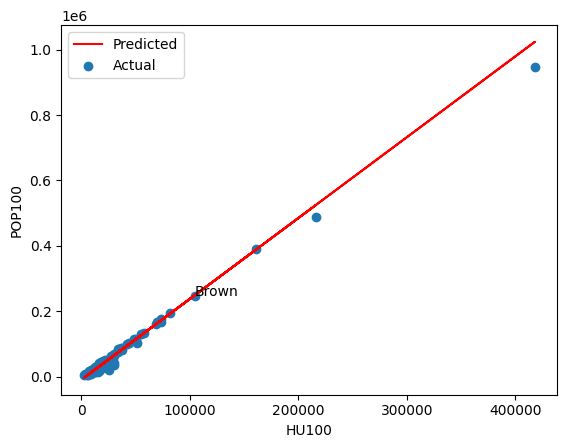

In [25]:
#Q11

brown = train[train["NAME"] == "Brown County"]
x_brown = int(brown["HU100"].values[0])
y_brown = int(brown["POP100"].values[0])

#plt.plot(pop, hu)
plt.xlabel('HU100')
plt.ylabel('POP100')

#plt.show()
x = np.concatenate((train["HU100"].values, test["HU100"].values))
y = np.concatenate((train["POP100"].values, test["POP100"].values))
pop = range(0, 40000)
hu = [2.47*i - 9276.89 for i in x]

plt.plot(x, hu, label= 'Predicted', color="red")
plt.scatter(x, y, label='Actual')
plt.text(x_brown, y_brown, "Brown")
plt.legend()

In [26]:
#Q12
A = np.array([
    [0,0,5,8,4],
    [1,2,4,0,3],
    [2,4,0,9,2],
    [3,5,2,1,1],
    [0,5,0,1,0]
])
count = np.count_nonzero((A >= 3) & (A <= 6))
count

8

In [27]:
brown_geo = brown["geometry"]
from matplotlib.colors import ListedColormap

c = np.zeros((256,3))
c[0] = [0.00000000000, 0.00000000000, 0.00000000000]
c[11] = [0.27843137255, 0.41960784314, 0.62745098039]
c[12] = [0.81960784314, 0.86666666667, 0.97647058824]
c[21] = [0.86666666667, 0.78823529412, 0.78823529412]
c[22] = [0.84705882353, 0.57647058824, 0.50980392157]
c[23] = [0.92941176471, 0.00000000000, 0.00000000000]
c[24] = [0.66666666667, 0.00000000000, 0.00000000000]
c[31] = [0.69803921569, 0.67843137255, 0.63921568628]
c[41] = [0.40784313726, 0.66666666667, 0.38823529412]
c[42] = [0.10980392157, 0.38823529412, 0.18823529412]
c[43] = [0.70980392157, 0.78823529412, 0.55686274510]
c[51] = [0.64705882353, 0.54901960784, 0.18823529412]
c[52] = [0.80000000000, 0.72941176471, 0.48627450980]
c[71] = [0.88627450980, 0.88627450980, 0.75686274510]
c[72] = [0.78823529412, 0.78823529412, 0.46666666667]
c[73] = [0.60000000000, 0.75686274510, 0.27843137255]
c[74] = [0.46666666667, 0.67843137255, 0.57647058824]
c[81] = [0.85882352941, 0.84705882353, 0.23921568628]
c[82] = [0.66666666667, 0.43921568628, 0.15686274510]
c[90] = [0.72941176471, 0.84705882353, 0.91764705882]
c[95] = [0.43921568628, 0.63921568628, 0.72941176471]
custom_cmap = ListedColormap(c)

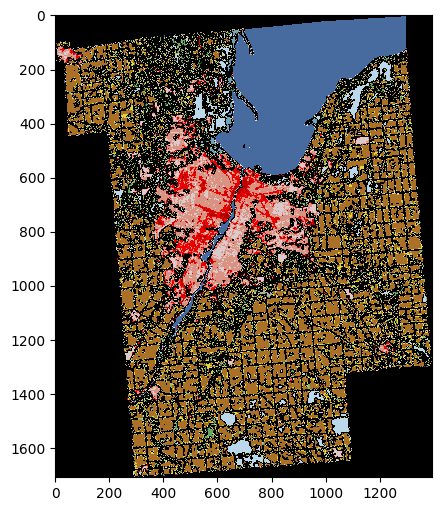

In [28]:
#Q13
import rasterio
from rasterio.mask import mask
land = rasterio.open("zip://land.zip!wi.tif")
matrix, _ = mask(land, brown_geo.to_crs(land.crs), crop = True)
matrix = matrix[0]
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(matrix, vmin=0, vmax=255, cmap = custom_cmap)

In [29]:
#Q14
land_use = {"open_water": 11,
            "ice_snow": 12,
            "developed_open": 21,
            "developed_low": 22,
            "developed_med": 23,
            "developed_high": 24,
            "barren": 31,
            "deciduous": 41,
            "evergreen": 42,
            "mixed_forest": 43,
            "dwarf_scrub": 51,
            "shrub_scrub": 52,
            "grassland": 71,
            "sedge": 72,
            "lichens": 73,
            "moss": 74,
            "pasture": 81,
            "crops": 82,
            "woody_wetlands": 90,
            "herbacious_wetlands": 95}
non_zero = matrix[np.nonzero(matrix)]
np.size(np.where(non_zero == land_use["open_water"])) / np.size(non_zero)


0.13797526789725206

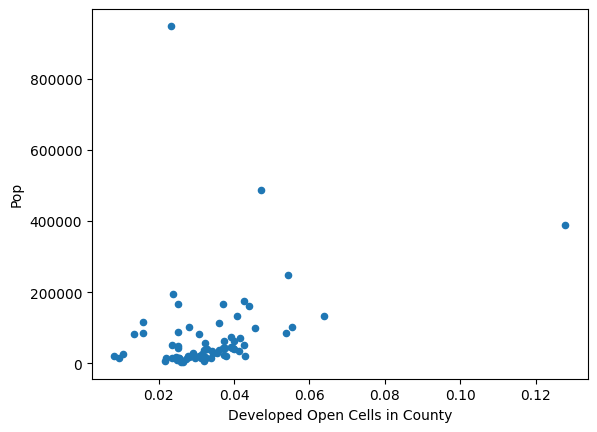

In [30]:
#Q15
developed_open = []
for county in gdf['NAME']:
    geo = gdf[gdf["NAME"]==county]['geometry']
    matrix, _ = mask(land, geo.to_crs(land.crs), crop=True)
    matrix = matrix[0]
    non_zero = matrix[np.nonzero(matrix)]
    pct = np.size(np.where(non_zero == land_use["developed_open"])) / np.size(non_zero)
    developed_open.append(pct)
gdf['developed_open'] = developed_open

ax = gdf.plot.scatter(x='developed_open', y='POP100')
ax.set_xlabel("Developed Open Cells in County")
ax.set_ylabel("Pop")
plt.show()

In [31]:
tracts_gdf = gpd.read_file('tracts.shp')
county_masks = {}
for county in tracts_gdf['GEOID']:
    geo = tracts_gdf[tracts_gdf["GEOID"]==county]['geometry']
    matrix, _ = mask(land, geo.to_crs(land.crs), crop=True)
    matrix = matrix[0]
    county_masks[county] = matrix


In [32]:
for key in land_use.keys():
    cell_count = []
    for county in tracts_gdf['GEOID']:
        county_matrix = county_masks[county]
        non_zero = county_matrix[np.nonzero(county_matrix)]
        cells = np.size(np.where(non_zero == land_use[key]))
        cell_count.append(cells)
    tracts_gdf[key] = cell_count

<AxesSubplot:>

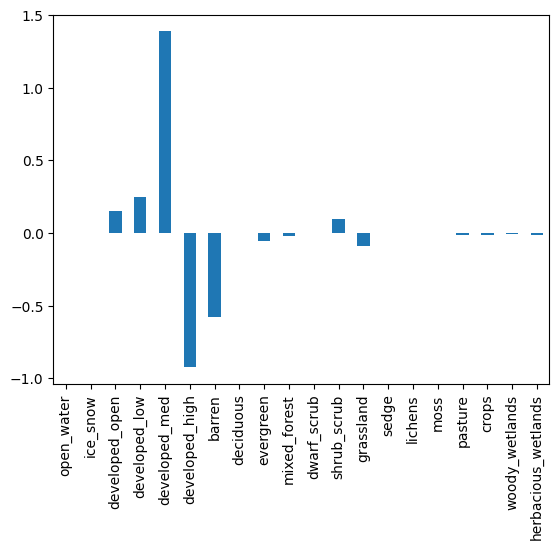

In [33]:
#Q16
test, train = train_test_split(tracts_gdf, random_state=200, test_size=0.20)
x_cols = list(land_use.keys())
y_col = "POP100"
model = LinearRegression()
model.fit(train[x_cols], train[y_col])
model.score(test[x_cols], test[y_col])
pd.Series(model.coef_, index=x_cols).plot.bar()

In [34]:
# The graph is showing that the most signifficant factors in predicting the population are 
# developed_high and developed_med. This is because their coeficients are the largest (see graph below)

In [35]:
#Q17
x_cols = ["developed_high", "developed_med", "developed_high"]
y_col = "POP100"
model1 = LinearRegression()
model2 = m2 = Pipeline([
    ("pf", PolynomialFeatures()),
    ("lr", LinearRegression())
])
model1_scores = cross_val_score(model1, train[x_cols], train[y_col])
model2_scores = cross_val_score(model2, train[x_cols], train[y_col], cv = 10)
model1.fit(train[x_cols], train[y_col])
model2.fit(train[x_cols], train[y_col])
model2.score(test[x_cols], test[y_col])

0.43003395611486495

In [36]:
# I would recommend using the second model because it scored higher, therefore explainig more of the data